In [1]:
dataset = [2,2,3,4,5,5,5,6,7,8,8,8,8,8,9,9,10,11,11,12]

index = dataset.index(10)
percentile = index/ len(dataset) * 100
print(percentile)

80.0


In [2]:
percentile = 25
index = (len(dataset) + 1) * percentile / 100
print(index)

5.25


In [3]:
import pandas as pd
dataset = [1,2,2,2,3,3,4,5,5,5,6,6,6,6,7,8,8,9,27]
t = {'label':dataset}
data = pd.DataFrame(t)
Q1 = (25/100) * (len(dataset) + 1)
print(Q1)
Q1_value = dataset[int(Q1) - 1]
Q3 = (75/100) * (len(dataset) + 1)
print(Q3)
Q3_value = dataset[int(Q3) - 1]
print(f'{Q1_value} {Q3_value}')

5.0
15.0
3 7


In [4]:
IQR = Q3_value - Q1_value
print(IQR)
data.describe()

4


,label
count,19.000000
mean,6.052632
std,5.562510
min,1.000000
25%,3.000000
50%,5.000000
75%,6.500000
max,27.000000


In [5]:
#lower_fence  
lf = Q1_value - 1.5 * IQR
#upper fence 
uf = Q3_value + 1.5 * IQR
print(f'{lf}\n{uf}')

-3.0
13.0


In [6]:
import numpy as np
import pandas as pd

df = pd.read_csv("train-data.csv",index_col=0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [8]:
row, col = df.shape
perc = df.New_Price.isnull().sum()/ row * 100
print(perc)
print(42/row * 100) 

86.31001827546105
0.6977903306197043


## INFO:
- out of 6019 record, a whooping 86% dont have data on new_price
    - dropping it would be better decision


In [9]:
df_1 = df.drop(['New_Price'],axis='columns')
df_1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [10]:
def standardize(x):
    try:
        return float(x.strip().split()[0])
    except:
        return x
    
df_1['Mileage'] =  df.Mileage.map(standardize)
df_1['Engine'] = df.Engine.map(standardize)
print(df_1.Mileage.dtypes, df_1.Engine.dtypes)
df_1.head()

float64 float64


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74


In [11]:
df_1['Power'] = df.Power.map(standardize)
print(df_1.Power.dtypes)
df_1.head()

object


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74


In [12]:
# power type is float
unique_types = df_1.Power.map(lambda x:type(x)).unique()
unique_types

array([<class 'float'>, <class 'str'>], dtype=object)

In [13]:
# 2 classes -> float and string
df_1[df_1.Power.map(lambda x:type(x) == str)].Power.unique()

array(['null bhp'], dtype=object)

In [14]:
df_1.Power = df_1.Power.map(lambda x: x if type(x) == float else np.nan)
# another way
#outliners = df_1.Power.map(lambda x:type(x) == str)
# df_1.drop(df_1[outliners].index, inplace=True)
df_1.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [15]:
df_1.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [16]:
#df_1.groupby('Fuel_Type').count()
df_1.Fuel_Type.value_counts()

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

In [17]:
df_1 = df_1[df_1.Fuel_Type.isin(['Diesel', 'Petrol'])]
df_1.head()
owner_count = df_1.Owner_Type.value_counts()
owner_count

Owner_Type
First             4874
Second             956
Third              112
Fourth & Above       9
Name: count, dtype: int64

In [18]:
percentile = owner_count['Second'] + owner_count['Third'] + owner_count['Fourth & Above']
percentile = percentile/row * 100
percentile

17.893337763748132

In [19]:
second, third, fourth_plus = 'Second', 'Third', 'Fourth & Above'
price_cars = {second:0, third:0, fourth_plus:0}
def avg_price(ownership):
    price = df[df['Owner_Type'] == ownership].Price.mean()
    price_cars[ownership] = price
for i in price_cars.keys():
    avg_price(i)
print(price_cars)


{'Second': 7.599886363636364, 'Third': 5.007256637168141, 'Fourth & Above': 3.28}


In [20]:
df_1.Owner_Type = df_1.Owner_Type.map(lambda x: x if x == 'First' else 'Second & Above')
df_1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second & Above,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [21]:
location_count =  df_1.Location.value_counts()
location_count

Location
Mumbai        771
Hyderabad     733
Kochi         643
Coimbatore    636
Pune          608
Delhi         544
Kolkata       535
Chennai       491
Jaipur        411
Bangalore     358
Ahmedabad     221
Name: count, dtype: int64

In [22]:
location_spread = [[v, k] for k, v in location_count.items()]
location_spread

[[771, 'Mumbai'],
 [733, 'Hyderabad'],
 [643, 'Kochi'],
 [636, 'Coimbatore'],
 [608, 'Pune'],
 [544, 'Delhi'],
 [535, 'Kolkata'],
 [491, 'Chennai'],
 [411, 'Jaipur'],
 [358, 'Bangalore'],
 [221, 'Ahmedabad']]

In [23]:
location_spread.sort()
Q1 = int(25/100 * len(location_spread))
Q1_value = location_spread[Q1]
Q3 = int(75/100 * len(location_spread))
Q3_value = location_spread[Q3]
IQR = Q3_value[0] - Q1_value[0]
print(f'{Q1_value}, {Q3_value}, {IQR}')


[411, 'Jaipur'], [643, 'Kochi'], 232


In [24]:
df_1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second & Above,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [25]:
len(df_1.Name.unique())

1847

In [26]:
df_1.Name = df_1.Name.map(lambda x: x.strip().lower())
len(df_1.Name.unique())

1823

In [27]:
df_1.Name = df_1.Name.map(lambda x: ' '.join(x.split()[:2]))
df_1.Name

1        hyundai creta
2           honda jazz
3        maruti ertiga
4              audi a4
6         nissan micra
             ...      
6014      maruti swift
6015     hyundai xcent
6016     mahindra xylo
6017      maruti wagon
6018    chevrolet beat
Name: Name, Length: 5951, dtype: object

In [28]:
temp = df_1.Name.value_counts()
temp

Name
maruti swift         353
honda city           270
hyundai i20          247
hyundai verna        170
toyota innova        164
                    ... 
volkswagen beetle      1
fiat petra             1
volkswagen tiguan      1
mini countryman        1
jaguar f               1
Name: count, Length: 213, dtype: int64

In [29]:
car_counts = [temp[k] for k in temp.keys()]
Q1 = int(25/100 * len(car_counts))
Q3 = int(75/100 * len(car_counts))
IQR = car_counts[Q3] - car_counts[Q1]
lf, uf = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
print(f'lower fence {lf}, upper fence {uf}')



lower fence 93.5, upper fence 118.5


In [30]:
car_count_30_plus = temp[temp > 30]
car_count_30_plus

Name
maruti swift             353
honda city               270
hyundai i20              247
hyundai verna            170
toyota innova            164
hyundai i10              155
hyundai grand            152
volkswagen polo          151
maruti alto              134
maruti wagon             126
mahindra xuv500          113
volkswagen vento         107
honda amaze              106
ford figo                101
toyota fortuner          101
bmw 3                     98
ford ecosport             95
mercedes-benz new         94
hyundai creta             93
mercedes-benz e-class     88
renault duster            83
audi a4                   78
hyundai santro            74
maruti ciaz               71
maruti ertiga             71
bmw 5                     68
toyota corolla            67
maruti ritz               64
maruti baleno             63
mahindra scorpio          61
toyota etios              61
land rover                60
honda brio                60
hyundai eon               60
honda jaz

In [31]:
df_1 = df_1[df_1.Name.map(lambda x : x in car_count_30_plus)]
len(df_1.Name.unique())


52

In [32]:
df_1.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                32
Power                116
Seats                 35
Price                  0
dtype: int64

In [33]:
df_1 = df_1.applymap(lambda x: np.nan if x == 0 else x)
df_1.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               49
Engine                32
Power                116
Seats                 36
Price                  0
dtype: int64

In [34]:
df_1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second & Above,15.20,1968.0,140.80,5.0,17.74
6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [35]:
print(df_1[['Mileage', 'Engine', 'Power']].mean())
print(df_1[['Mileage', 'Engine', 'Power']].median())

Mileage      18.718244
Engine     1556.333696
Power       107.549288
dtype: float64
Mileage      18.74
Engine     1399.00
Power        89.84
dtype: float64


In [36]:
df_1.groupby(['Fuel_Type'])['Engine'].agg(['mean', 'median'])


,mean,median
Fuel_Type,,
Diesel,1796.109583,1582.0
Petrol,1293.685532,1197.0


In [37]:
df_1.Fuel_Type.value_counts()

Fuel_Type
Diesel    2407
Petrol    2216
Name: count, dtype: int64

In [38]:
df_1.groupby('Transmission')['Engine'].agg(['mean', 'median'])

,mean,median
Transmission,,
Automatic,1972.126188,1968.0
Manual,1416.242865,1248.0


In [39]:
df_1.Transmission.value_counts()

Transmission
Manual       3459
Automatic    1164
Name: count, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='Engine'>

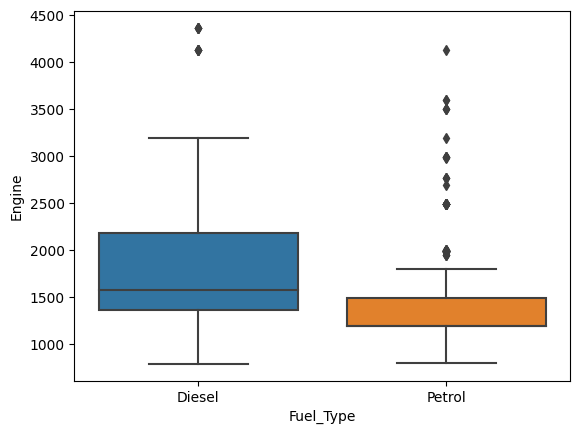

In [40]:
import seaborn as sns
sns.boxplot(x='Fuel_Type', y = 'Engine', data=df_1)

In [41]:
all_diesel_cars = df_1[df_1['Fuel_Type'] == 'Diesel']
all_petrol_cars = df_1[df_1['Fuel_Type'] == 'Petrol']
all_diesel_cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second & Above,15.20,1968.0,140.80,5.0,17.74
6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,toyota innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50
...,...,...,...,...,...,...,...,...,...,...,...,...
6012,toyota innova,Coimbatore,2011,45004,Diesel,Manual,First,12.80,2494.0,102.00,7.0,9.48
6013,honda amaze,Coimbatore,2015,70602,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.83
6014,maruti swift,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,hyundai xcent,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00


In [42]:
all_petrol_cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
10,maruti ciaz,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,9.95
11,honda city,Kolkata,2012,60000,Petrol,Automatic,First,16.80,1497.0,116.30,5.0,4.49
22,audi a6,Mumbai,2015,55985,Petrol,Automatic,First,13.53,1984.0,177.01,5.0,23.50
23,hyundai i20,Kolkata,2010,45807,Petrol,Manual,First,18.50,1197.0,80.00,5.0,1.87
...,...,...,...,...,...,...,...,...,...,...,...,...
6002,volkswagen vento,Mumbai,2011,38000,Petrol,Manual,First,16.09,1598.0,103.50,5.0,3.25
6003,maruti celerio,Bangalore,2015,67600,Petrol,Manual,First,23.10,998.0,67.04,5.0,4.00
6010,honda brio,Delhi,2013,33746,Petrol,Manual,First,18.50,1198.0,86.80,5.0,3.20
6011,skoda superb,Hyderabad,2009,53000,Petrol,Automatic,First,NaN,3597.0,262.60,5.0,4.75


In [43]:
#first go with diesel cars
all_diesel_cars.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,2407.000000,2407.000000,2398.000000,2400.000000,2363.000000,2398.000000,2407.000000
mean,2013.761944,66546.482759,19.280388,1796.109583,121.480339,5.522936,11.493004
std,2.696985,40399.633536,4.732423,575.627987,48.912399,0.955025,11.157733
min,1998.000000,1001.000000,8.200000,793.000000,47.000000,4.000000,0.700000
25%,2012.000000,42000.000000,15.100000,1364.000000,87.200000,5.000000,4.750000
50%,2014.000000,61730.000000,19.870000,1582.000000,103.200000,5.000000,7.450000
75%,2016.000000,80999.500000,22.900000,2179.000000,167.620000,5.000000,13.900000
max,2019.000000,775000.000000,28.400000,4367.000000,335.300000,9.000000,160.000000


In [44]:
Q1 = all_diesel_cars.Engine.describe()['25%']
Q3 = all_diesel_cars.Engine.describe()['75%']
IQR = Q3 - Q1
lf = Q1 - 1.5 * IQR
hf = Q3 + 1.5 * IQR
print(lf, hf)
def in_range(x):
    return not(x < lf or x > hf)
all_diesel_cars = all_diesel_cars[all_diesel_cars.Engine.map(in_range)]

141.5 3401.5


In [45]:
all_diesel_cars.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               9
Engine                7
Power                44
Seats                 9
Price                 0
dtype: int64

In [46]:
all_diesel_cars.Engine.unique()

array([1582., 1248., 1968., 1461., 2755., 1598., 2179., 1498., 2143.,
       1995., 2494., 2698., 1199., 1120., 2393., 1399., 2148., 1396.,
       2982., 1493., 2967.,  936., 1997., 1364., 2993.,  793., 1999.,
       2953., 1896., 2987., 1405., 3198., 1186.,   nan, 2609., 2499.,
       2198., 2495., 1950., 2496., 2523., 1388., 1796., 2720.])

In [47]:
all_petrol_cars.describe()
Q1 = all_petrol_cars.Engine.describe()['25%']
Q3 = all_petrol_cars.Engine.describe()['75%']
IQR = Q3 - Q1
lf = Q1 - 1.5 * IQR
hf = Q3 + 1.5 * IQR
all_petrol_cars = all_petrol_cars[~((all_petrol_cars.Engine < lf) | (all_petrol_cars.Engine > hf))]
print(lf, hf)
all_petrol_cars


744.5 1948.5


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
10,maruti ciaz,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,9.95
11,honda city,Kolkata,2012,60000,Petrol,Automatic,First,16.80,1497.0,116.30,5.0,4.49
23,hyundai i20,Kolkata,2010,45807,Petrol,Manual,First,18.50,1197.0,80.00,5.0,1.87
24,volkswagen vento,Kolkata,2010,33000,Petrol,Automatic,First,14.40,1598.0,103.60,5.0,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...
6000,hyundai i20,Bangalore,2014,68010,Petrol,Manual,Second & Above,18.50,1197.0,82.85,5.0,5.25
6002,volkswagen vento,Mumbai,2011,38000,Petrol,Manual,First,16.09,1598.0,103.50,5.0,3.25
6003,maruti celerio,Bangalore,2015,67600,Petrol,Manual,First,23.10,998.0,67.04,5.0,4.00
6010,honda brio,Delhi,2013,33746,Petrol,Manual,First,18.50,1198.0,86.80,5.0,3.20


In [48]:
all_diesel_cars.Engine = all_diesel_cars.Engine.map(lambda x: all_diesel_cars['Engine'].mean() if pd.isnull(x) else x)
all_diesel_cars.isnull().sum()

C:\Users\amalb\AppData\Local\Temp\ipykernel_31692\771525932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_diesel_cars.Engine = all_diesel_cars.Engine.map(lambda x: all_diesel_cars['Engine'].mean() if pd.isnull(x) else x)


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               9
Engine                0
Power                44
Seats                 9
Price                 0
dtype: int64

In [49]:
all_petrol_cars.Engine = all_petrol_cars.Engine.map(lambda x:all_petrol_cars['Engine'].mean() if pd.isnull(x) else x)
all_petrol_cars.isnull().sum()

C:\Users\amalb\AppData\Local\Temp\ipykernel_31692\4289911846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_petrol_cars.Engine = all_petrol_cars.Engine.map(lambda x:all_petrol_cars['Engine'].mean() if pd.isnull(x) else x)


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              37
Engine                0
Power                71
Seats                26
Price                 0
dtype: int64

In [50]:
df_2 = pd.concat([all_diesel_cars, all_petrol_cars])
df_2

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second & Above,15.20,1968.0,140.80,5.0,17.74
6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,toyota innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50
...,...,...,...,...,...,...,...,...,...,...,...,...
6000,hyundai i20,Bangalore,2014,68010,Petrol,Manual,Second & Above,18.50,1197.0,82.85,5.0,5.25
6002,volkswagen vento,Mumbai,2011,38000,Petrol,Manual,First,16.09,1598.0,103.50,5.0,3.25
6003,maruti celerio,Bangalore,2015,67600,Petrol,Manual,First,23.10,998.0,67.04,5.0,4.00
6010,honda brio,Delhi,2013,33746,Petrol,Manual,First,18.50,1198.0,86.80,5.0,3.20


In [51]:
df_2.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               46
Engine                 0
Power                115
Seats                 35
Price                  0
dtype: int64

In [52]:
df_2.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,4555.000000,4555.000000,4509.000000,4555.000000,4440.000000,4520.000000,4555.000000
mean,2013.502744,57787.288474,18.822213,1537.305484,105.893982,5.279646,8.215133
std,3.074779,38154.789727,3.929764,509.435300,41.628549,0.745945,8.761849
min,1998.000000,171.000000,8.200000,793.000000,46.300000,4.000000,0.650000
25%,2012.000000,34632.000000,16.100000,1197.000000,75.000000,5.000000,3.500000
50%,2014.000000,53442.000000,18.880000,1399.000000,88.800000,5.000000,5.500000
75%,2016.000000,72016.000000,21.500000,1796.000000,123.272500,5.000000,8.850000
max,2019.000000,775000.000000,28.400000,3198.000000,265.000000,9.000000,160.000000


In [53]:
df_2.groupby('Year').Power.agg(['mean', 'median'])

,mean,median
Year,,
1998,157.700000,157.70
1999,90.000000,90.00
2001,84.000000,84.00
2002,67.220000,66.00
2003,73.680000,66.00
2004,85.508333,67.10
2005,108.000000,102.00
2006,86.807317,78.00
2007,100.330984,100.00


In [54]:
df_2.groupby('Engine').Power.agg(['mean', 'median'])

,mean,median
Engine,,
793.0,47.000000,47.0
796.0,46.830000,47.3
799.0,53.300000,53.3
814.0,55.189655,55.2
936.0,57.290476,57.6
...,...,...
2967.0,241.748293,241.4
2982.0,169.394186,168.5
2987.0,223.638889,198.5


In [55]:
df_2.head()
test_data = df_2.loc[:, ['Year','Mileage','Seats','Power','Price']]

In [56]:
df_2.groupby('Fuel_Type')['Power'].agg(['mean','median'])

,mean,median
Fuel_Type,,
Diesel,120.515408,102.6
Petrol,89.423870,82.0


In [57]:
matrix = test_data.corr()
print(matrix)

             Year   Mileage     Seats     Power     Price
Year     1.000000  0.275784  0.003405  0.032533  0.332148
Mileage  0.275784  1.000000 -0.457654 -0.545719 -0.326439
Seats    0.003405 -0.457654  1.000000  0.278269  0.231094
Power    0.032533 -0.545719  0.278269  1.000000  0.768408
Price    0.332148 -0.326439  0.231094  0.768408  1.000000


In [58]:
# Power is influenced by mileage as well as Price
mean_power = df_2.groupby('Price').Power.agg(['mean','median'])
avg_power = mean_power['mean'].mean()
df_2.Power = df_2.Power.map(lambda x: avg_power if np.isnan(x) else x)
df_2.isnull().sum()
test_data.Power = df_2.Power
print(test_data.corr())

             Year   Mileage     Seats     Power     Price
Year     1.000000  0.275784  0.003405  0.013702  0.332148
Mileage  0.275784  1.000000 -0.457654 -0.544237 -0.326439
Seats    0.003405 -0.457654  1.000000  0.274562  0.231094
Power    0.013702 -0.544237  0.274562  1.000000  0.755256
Price    0.332148 -0.326439  0.231094  0.755256  1.000000


In [59]:
df_2.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              46
Engine                0
Power                 0
Seats                35
Price                 0
dtype: int64

In [60]:
df_2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second & Above,15.20,1968.0,140.80,5.0,17.74
6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,toyota innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50


In [61]:
df_2.Seats = df_2.Seats.map(lambda x:x if not pd.isnull(x) else df_2.Seats.mean())
df_2.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              46
Engine                0
Power                 0
Seats                 0
Price                 0
dtype: int64

In [62]:
test_data.Seats = df_2.Seats
print(test_data.corr())

             Year   Mileage     Seats     Power     Price
Year     1.000000  0.275784  0.003354  0.013702  0.332148
Mileage  0.275784  1.000000 -0.456855 -0.544237 -0.326439
Seats    0.003354 -0.456855  1.000000  0.274377  0.230238
Power    0.013702 -0.544237  0.274377  1.000000  0.755256
Price    0.332148 -0.326439  0.230238  0.755256  1.000000


In [63]:
df_2.groupby('Fuel_Type').Mileage.agg(['mean', 'median'])

,mean,median
Fuel_Type,,
Diesel,19.318312,19.87
Petrol,18.264161,18.50


In [64]:
df_2.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,4555.000000,4555.000000,4509.000000,4555.000000,4555.000000,4555.000000,4555.000000
mean,2013.502744,57787.288474,18.822213,1537.305484,106.350056,5.279646,8.215133
std,3.074779,38154.789727,3.929764,509.435300,41.197180,0.743073,8.761849
min,1998.000000,171.000000,8.200000,793.000000,46.300000,4.000000,0.650000
25%,2012.000000,34632.000000,16.100000,1197.000000,75.940000,5.000000,3.500000
50%,2014.000000,53442.000000,18.880000,1399.000000,89.840000,5.000000,5.500000
75%,2016.000000,72016.000000,21.500000,1796.000000,123.958478,5.000000,8.850000
max,2019.000000,775000.000000,28.400000,3198.000000,265.000000,9.000000,160.000000


In [65]:
df_2.Mileage = df_2.Mileage.map(lambda x : df_2.Mileage.mean() if pd.isnull(x) else x)
df_2.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [66]:
df_2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second & Above,15.20,1968.0,140.80,5.0,17.74
6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,toyota innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50


In [67]:
df_2.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000
mean,2013.502744,57787.288474,18.822213,1537.305484,106.350056,5.279646,8.215133
std,3.074779,38154.789727,3.909867,509.435300,41.197180,0.743073,8.761849
min,1998.000000,171.000000,8.200000,793.000000,46.300000,4.000000,0.650000
25%,2012.000000,34632.000000,16.100000,1197.000000,75.940000,5.000000,3.500000
50%,2014.000000,53442.000000,18.880000,1399.000000,89.840000,5.000000,5.500000
75%,2016.000000,72016.000000,21.430000,1796.000000,123.958478,5.000000,8.850000
max,2019.000000,775000.000000,28.400000,3198.000000,265.000000,9.000000,160.000000


In [68]:
try:
    df_2.to_csv('processed_cars.csv')
except:
    print('already exist')

already exist
